In [14]:
N_NODES = 8000

In [22]:
from seirsplus.networks import generate_workplace_contact_network

In [27]:
generate_workplace_contact_network?

Signature:
generate_workplace_contact_network(
    num_cohorts=1,
    num_nodes_per_cohort=100,
    num_teams_per_cohort=10,
    mean_intracohort_degree=6,
    pct_contacts_intercohort=0.2,
    farz_params={'alpha': 5.0, 'gamma': 5.0, 'beta': 0.5, 'r': 1, 'q': 0.0, 'phi': 10, 'b': 0, 'epsilon': 1e-06, 'directed': False, 'weighted': False},
    distancing_scales=[],
)
Docstring: <no docstring>
File:      c:\users\amcga\envs\citation-deaths\lib\site-packages\seirsplus\networks.py
Type:      function


In [33]:
graphs, labels, households = generate_workplace_contact_network(
    num_cohorts=5,
    num_nodes_per_cohort=100,
    num_teams_per_cohort=10,
    mean_intracohort_degree=6,
    pct_contacts_intercohort=0.2,
    farz_params={'alpha': 5.0, 'gamma': 5.0, 'beta': 0.5, 'r': 1, 'q': 0.0, 'phi': 10, 'b': 0, 'epsilon': 1e-06, 'directed': False, 'weighted': True},
    distancing_scales=[],
)

In [38]:
large_component = nx.subgraph(graphs, list(nx.connected_components(graphs))[0])

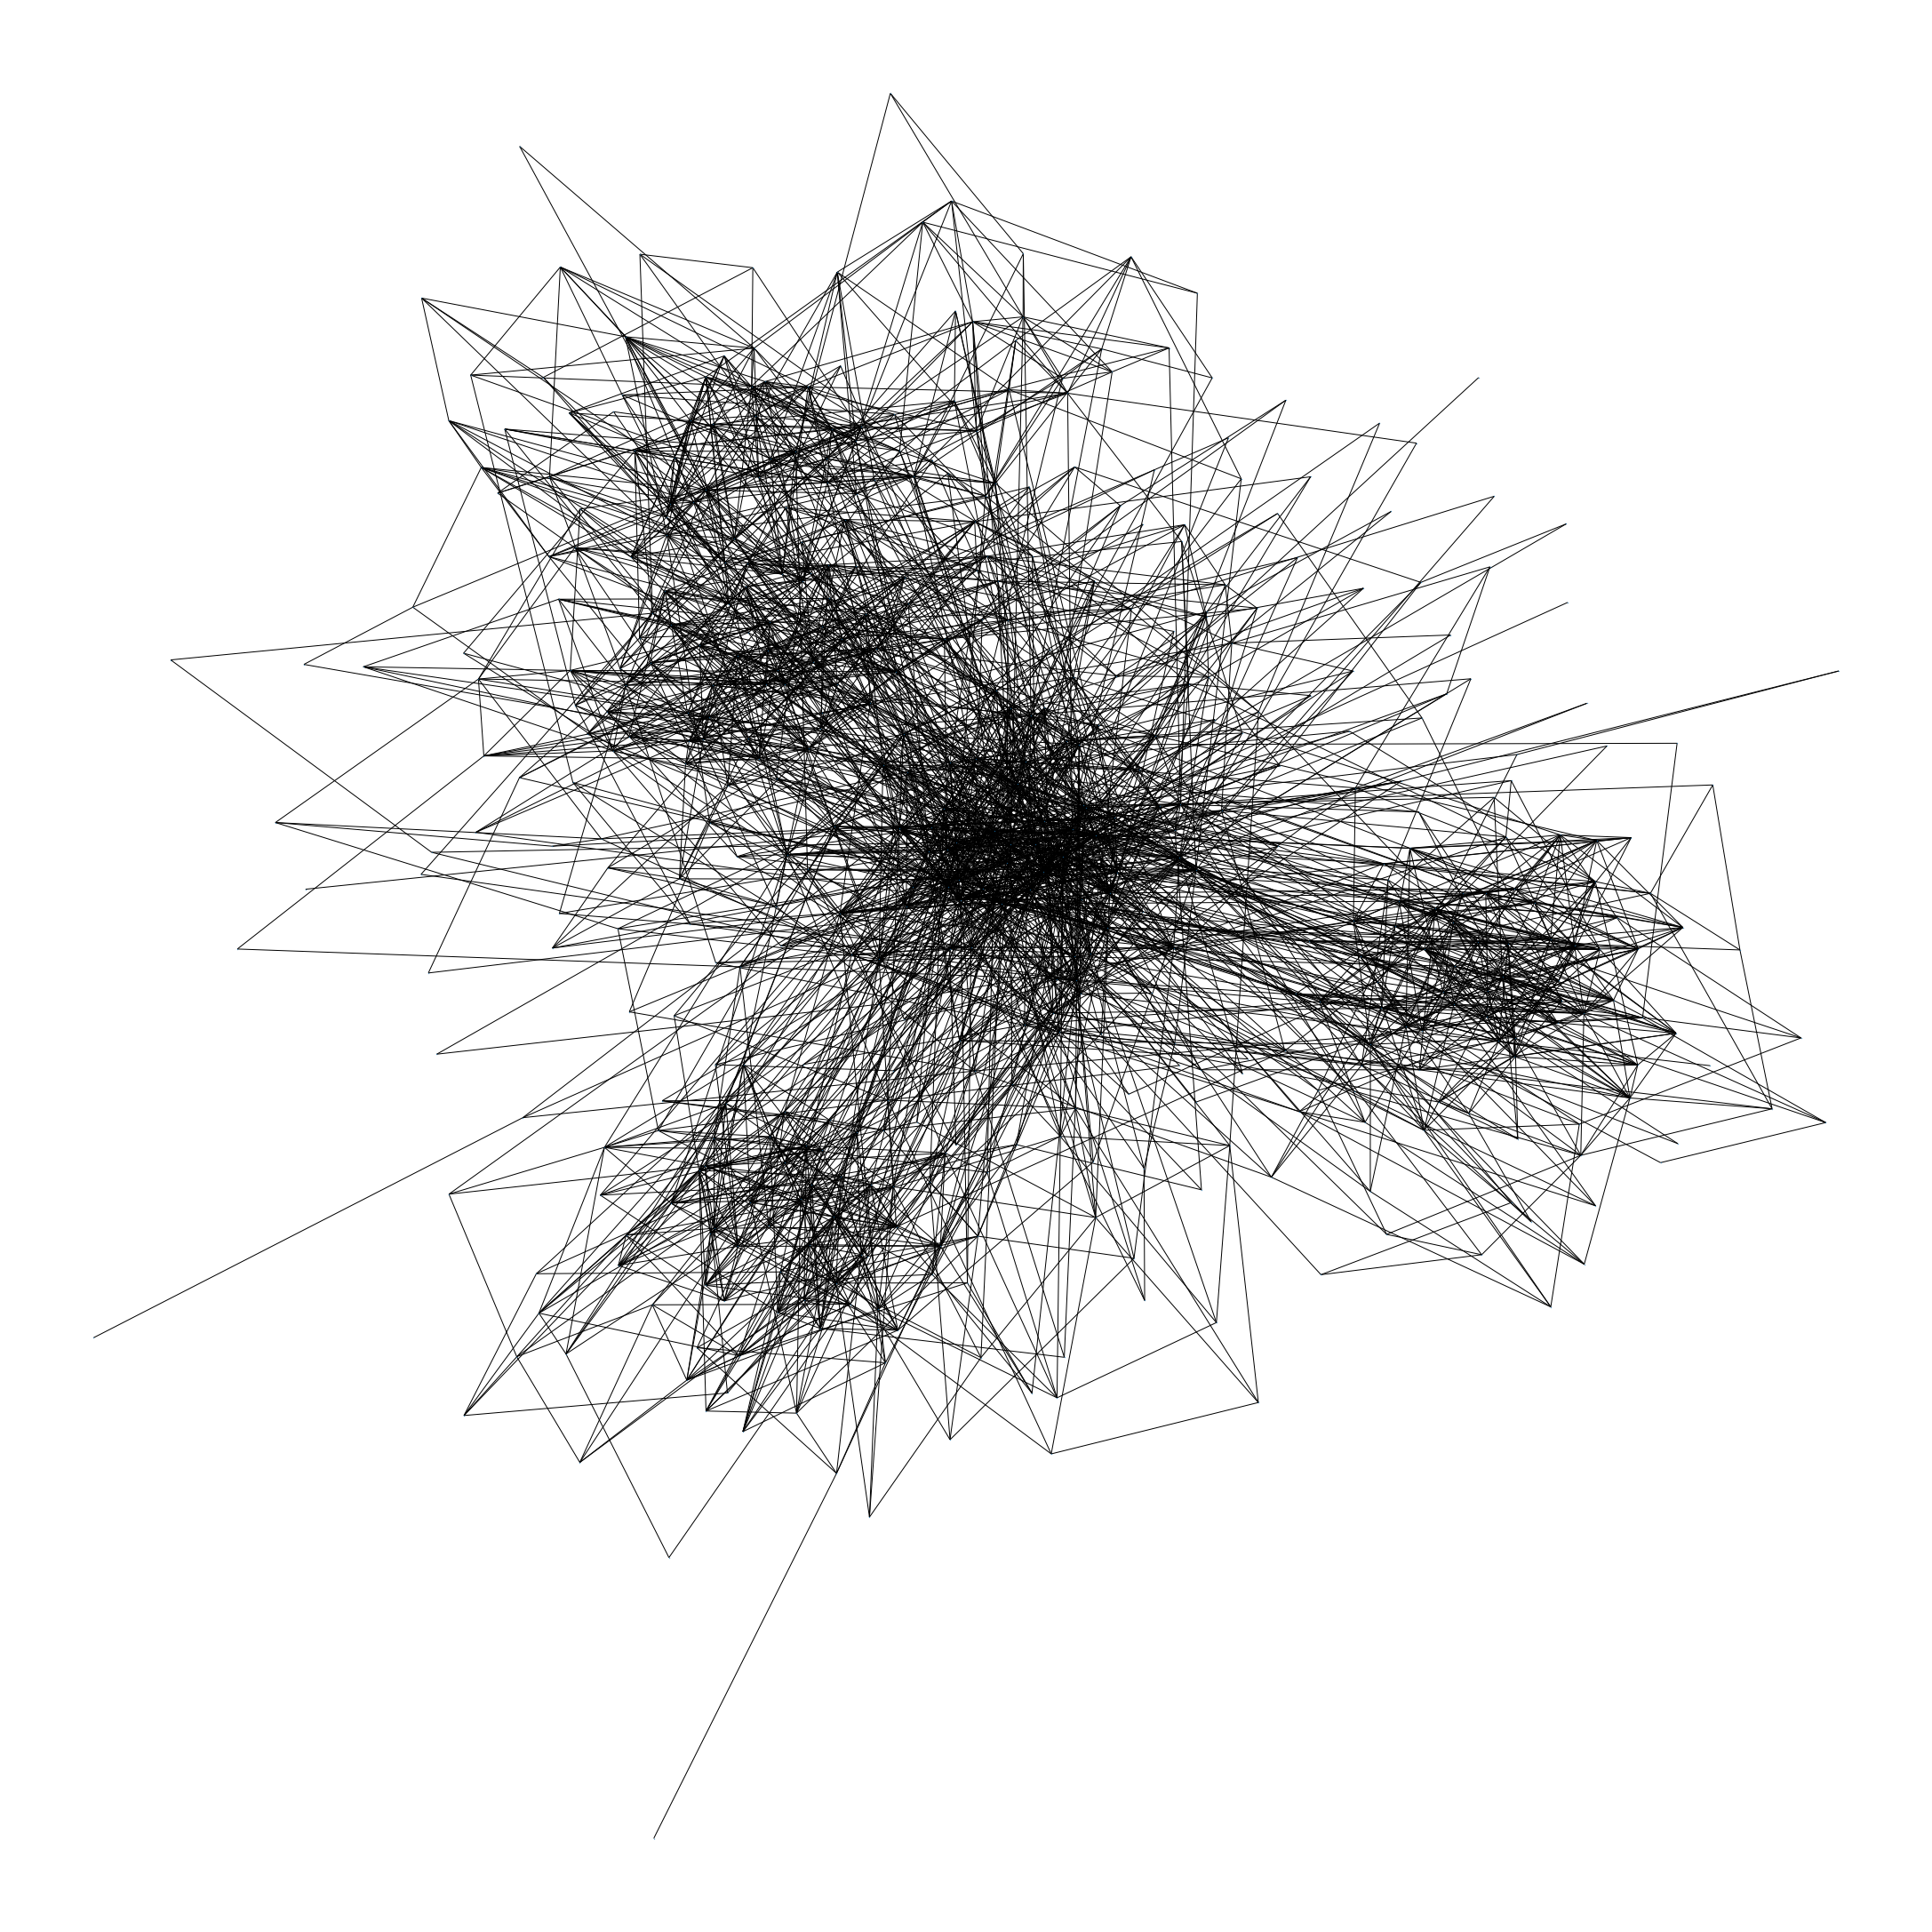

In [39]:
import networkx as nx 
from matplotlib import pyplot as plt
plt.figure(figsize=(30,30))
nx.draw(large_component, node_size=0.1)

In [40]:
len(G.nodes)

2000

# household? not weighted tho idk why

In [21]:
from seirsplus.networks import generate_demographic_contact_network

In [15]:
household_data = {
                   'age_distn':{'0-9': 0.121, '10-19': 0.131, '20-29': 0.137, '30-39': 0.133, '40-49': 0.124, '50-59': 0.131, '60-69': 0.115, '70-79': 0.070, '80+'  : 0.038  },
                   'household_size_distn':{ 1: 0.284, 2: 0.345, 3: 0.150, 4: 0.128, 5: 0.058, 6: 0.023, 7: 0.012 },
                   'household_stats':{ 'pct_with_under20': 0.337,                      # percent of households with at least one member under 60
                                       'pct_with_over60': 0.380,                       # percent of households with at least one member over 60
                                       'pct_with_under20_over60':  0.034,              # percent of households with at least one member under 20 and at least one member over 60
                                       'pct_with_over60_givenSingleOccupant': 0.110,   # percent of households with a single-occupant that is over 60
                                       'mean_num_under20_givenAtLeastOneUnder20': 1.91 # number of people under 20 in households with at least one member under 20
                                     }
                 }

In [16]:
age_distn_given20to60 = {}
for k,v in household_data['age_distn'].items():
    if "+" in k:
        continue
    f,t = list(map(int, k.split("-")))
    if f < 20 or f >= 60:
        continue
    age_distn_given20to60[k] = v
    
tot = sum(age_distn_given20to60.values())

for k,v in age_distn_given20to60.items():
    age_distn_given20to60[k] = age_distn_given20to60[k] / tot
    
age_distn_given20to60 = household_data['age_distn']

layer_info  = { '0-9':   {'ageBrackets': ['0-9'],   'meanDegree': 8.6,  'meanDegree_CI': (0.0, 17.7) },
                '10-19': {'ageBrackets': ['10-19'], 'meanDegree': 16.2, 'meanDegree_CI': (12.5, 19.8) },
                '20-59': {'ageBrackets': ['20-29', '30-39', '40-49', '50-59'], 'meanDegree': ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*15.3 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*13.8), 'meanDegree_CI': ( ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*12.6 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*11.0), ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*17.9 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*16.6) ) },
                '60+':   {'ageBrackets': ['60-69', '70-79', '80+'], 'meanDegree': 13.9, 'meanDegree_CI': (7.3, 20.5) } }

In [17]:
sum(household_data['household_size_distn'].values())

1.0

In [18]:
import networkx as nx

In [23]:
generate_demographic_contact_network?

Signature:
generate_demographic_contact_network(
    N,
    demographic_data,
    layer_generator='FARZ',
    layer_info=None,
    distancing_scales=[],
    isolation_groups=[],
    verbose=False,
)
Docstring: <no docstring>
File:      c:\users\amcga\envs\citation-deaths\lib\site-packages\seirsplus\networks.py
Type:      function


In [24]:
graphs, labels, households = generate_demographic_contact_network(
    N_NODES, 
    demographic_data=household_data, 
    #layer_generator='LFR', 
    layer_info=layer_info, 
    distancing_scales=[], 
    isolation_groups=[],
)

Generated overall age distribution:
0-9: 0.1170	(-0.0040 from target)
10-19: 0.1214	(-0.0096 from target)
20-29: 0.1288	(-0.0083 from target)
30-39: 0.1306	(-0.0024 from target)
40-49: 0.1244	(0.0004 from target)
50-59: 0.1333	(0.0023 from target)
60-69: 0.1250	(0.0100 from target)
70-79: 0.0772	(0.0072 from target)
80+: 0.0424	(0.0044 from target)

Generated household size distribution:
1: 0.2698	(-0.0142 from target)
2: 0.3611	(0.0161 from target)
3: 0.1483	(-0.0017 from target)
4: 0.1264	(-0.0016 from target)
5: 0.0609	(0.0029 from target)
6: 0.0209	(-0.0021 from target)
7: 0.0126	(0.0006 from target)
Num households: 3251
mean household size: 2.448

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [47]:
if False:
    large_component = nx.subgraph(graphs['baseline'], list(nx.connected_components(graphs['baseline']))[0])

    import networkx as nx 
    from matplotlib import pyplot as plt
    plt.figure(figsize=(30,30))
    nx.draw(large_component, node_size=0.1)

In [26]:
G = graphs['baseline']

In [27]:
list(G.edges.data())[:10]

[(0, 28, {'weight': 1}),
 (0, 70, {'weight': 1}),
 (0, 98, {'weight': 1}),
 (0, 113, {'weight': 1}),
 (0, 121, {'weight': 1}),
 (0, 163, {'weight': 1}),
 (0, 173, {'weight': 1}),
 (0, 233, {'weight': 1}),
 (0, 288, {'weight': 1}),
 (0, 292, {'weight': 1})]

In [28]:
import csv
with open('seirsplus_network.csv', 'w', encoding='utf8') as outf:
    w = csv.writer(outf)
    w.writerow(['f','t'])
    for f,t,rrr in G.edges.data():
        w.writerow([f,t])

# load the network 

In [1]:
from epi_model import *

In [2]:
net = unweightedNetwork.from_csv('seirsplus_network.csv', 20)

In [3]:
from datetime import datetime

In [4]:
p = dict(params.covid_estimate)
sim = simulations.SEIR_daily(net, p)

In [5]:
net.Nnodes

19972

In [8]:
for who in sample([x for x in range(net.Nnodes) if not sim.vacc[x]], 20):
    sim.state_change(who, 'inf')

sim.run(25)

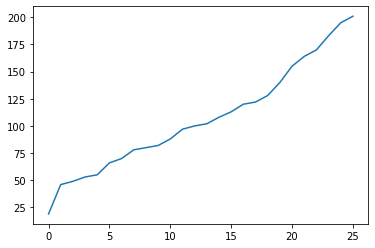

In [12]:
plt.plot(np.array(sim.meas['inf']) + np.array(sim.meas['exp']));

# try to use a more efficient package